In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from IPython.display import display
pd.set_option("display.max_columns",None)

# data understanding

In [4]:
data=pd.read_csv("supermarket_sales.csv")
data.head()

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.1,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.0,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.4,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.4,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,NaN,96.1735,16.8409


In [5]:
data.shape

(1000, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   806 non-null    object 
 2   CustomerID               1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            952 non-null    object 
 5   Gender                   975 non-null    object 
 6   Product line             977 non-null    object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   896 non-null    float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  979 non-null    object 
 14  cogs                     

In [7]:
data.columns

Index(['Invoice ID', 'Branch', 'CustomerID', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Longitude', 'Latitude'],
      dtype='object')

Dataset Feature Descriptions
Invoice ID – Unique ID for each transaction (like a bill number).

Branch – Store branch where the sale happened (e.g., A, B, or C).

CustomerID – Unique ID for each customer (used for tracking repeated customers).

City – City where the branch is located.

Customer type – Type of customer:

Member: Regular/registered customers

Normal: Walk-in or new customers

Gender – Customer gender: Male or Female

Product line – Category of the product bought (e.g., Health, Food, Electronics, etc.)

Unit price – Price of a single item.

Quantity – Number of items purchased.

Tax 5% – 5% tax applied to the total purchase.

Total – Final amount paid (includes tax).
Formula: Total = (Unit Price × Quantity) + Tax

Date – The date the transaction took place.

Time – The time of the transaction.

Payment – Payment method used: Cash, Credit card, or E-wallet

COGS (Cost of Goods Sold) – Actual cost to the store before profit (i.e., without tax).

Gross margin percentage – Percentage profit margin; fixed at 4.76% in this dataset.

Gross income – Profit earned from the sale.
Formula: Gross income = Tax 5%

Rating – Customer satisfaction rating (from 1 to 10).

Longitude – Geographic longitude of the store (used in maps).

Latitude – Geographic latitude of the store (used in maps).



In [8]:
data.isnull().sum()

Invoice ID                   0
Branch                     194
CustomerID                   0
City                         0
Customer type               48
Gender                      25
Product line                23
Unit price                   0
Quantity                     0
Tax 5%                     104
Total                        0
Date                         0
Time                         0
Payment                     21
cogs                         0
gross margin percentage      0
gross income                 0
Rating                     143
Longitude                    0
Latitude                     0
dtype: int64

In [9]:
data.head()

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.1,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.0,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.4,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.4,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,NaN,96.1735,16.8409


In [10]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
count,1000.000000,1000.000000,896.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,857.000000,1000.000000,1000.000000
mean,55.672130,7.485000,20.966930,419.149340,307.775883,4.761905e+00,111.373457,7.462625,96.114319,19.498590
std,26.494628,4.520643,17.604704,347.824683,234.425682,6.131498e-14,149.212835,1.776179,0.042715,2.106757
min,10.080000,1.000000,0.508500,10.170000,10.170000,4.761905e+00,0.000000,4.000000,96.078500,16.840900
25%,32.875000,4.000000,7.479500,152.745000,118.497500,4.761905e+00,0.000000,5.900000,96.078500,16.840900
50%,55.230000,7.000000,15.468250,317.695000,241.760000,4.761905e+00,63.650000,7.455000,96.089100,19.763300
75%,77.935000,11.000000,30.205875,605.222500,448.905000,4.761905e+00,161.022500,9.100000,96.173500,21.958800
max,99.960000,20.000000,87.498000,1749.960000,993.000000,4.761905e+00,874.980000,10.000000,96.173500,21.958800


# data preprocessing

In [11]:
missing_val_perc=data.isnull().sum()/len(data)*100

In [12]:
missing_val_perc.sort_values(ascending= False)

Branch                     19.4
Rating                     14.3
Tax 5%                     10.4
Customer type               4.8
Gender                      2.5
Product line                2.3
Payment                     2.1
Invoice ID                  0.0
Longitude                   0.0
gross income                0.0
gross margin percentage     0.0
cogs                        0.0
Total                       0.0
Time                        0.0
Date                        0.0
Quantity                    0.0
Unit price                  0.0
City                        0.0
CustomerID                  0.0
Latitude                    0.0
dtype: float64

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.drop(columns=['Invoice ID','CustomerID'],inplace=True)

In [15]:
data.head(10)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,A,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.1,96.1735,16.8409
1,C,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.0,96.0785,19.7633
2,A,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.4,96.1735,16.8409
3,A,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.4,96.1735,16.8409
4,A,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,NaN,96.1735,16.8409
5,C,Naypyitaw,Normal,Male,Health and beauty,85.39,8,34.1560,683.12,06-01-2019,18:30,Ewallet,597.730000,4.761905,85.390000,NaN,96.0785,19.7633
6,A,Yangon,Normal,Female,Health and beauty,68.84,6,20.6520,413.04,15-12-2019,14:36,Ewallet,413.040000,4.761905,0.000000,NaN,96.1735,16.8409
7,C,Naypyitaw,NaN,Female,Health and beauty,73.56,12,44.1360,882.72,14-06-2019,11:38,Ewallet,735.600000,4.761905,147.120000,NaN,96.0785,19.7633
8,A,Yangon,NaN,Female,Health and beauty,36.26,2,3.6260,72.52,25-11-2019,17:15,Credit card,72.520000,4.761905,0.000000,NaN,96.1735,16.8409
9,B,Mandalay,NaN,Female,Health and beauty,54.84,4,10.9680,219.36,10-04-2019,13:27,Credit card,164.520000,4.761905,54.840000,NaN,96.0891,21.9588


In [16]:
missing_val_perc=data.isnull().sum()/len(data)*100

In [17]:
missing_val_perc.sort_values(ascending= False)

Branch                     19.4
Rating                     14.3
Tax 5%                     10.4
Customer type               4.8
Gender                      2.5
Product line                2.3
Payment                     2.1
Longitude                   0.0
gross income                0.0
gross margin percentage     0.0
cogs                        0.0
Date                        0.0
Time                        0.0
City                        0.0
Total                       0.0
Quantity                    0.0
Unit price                  0.0
Latitude                    0.0
dtype: float64

## Missing values handling 

In [18]:
data['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [19]:
data['Branch'].unique()

array(['A', 'C', 'B', nan], dtype=object)

In [20]:
for i in range(len(data)):
    if pd.isna(data['Branch'][i])==True:
       if(data["City"][i])=="Yangon":
           data["Branch"][i]="A"
       elif(data["City"][i])=="Naypyitaw":
           data["Branch"][i]="C"
       elif(data["City"][i])=="Mandalay":
           data["Branch"][i]="B"
       else:
           print('Invalid city at index:',i)

In [21]:
missing_val_perc=data.isnull().sum()/len(data)*100
missing_val_perc.sort_values(ascending= False)

Rating                     14.3
Tax 5%                     10.4
Customer type               4.8
Gender                      2.5
Product line                2.3
Payment                     2.1
Branch                      0.0
Longitude                   0.0
gross income                0.0
gross margin percentage     0.0
cogs                        0.0
Date                        0.0
Time                        0.0
City                        0.0
Total                       0.0
Quantity                    0.0
Unit price                  0.0
Latitude                    0.0
dtype: float64

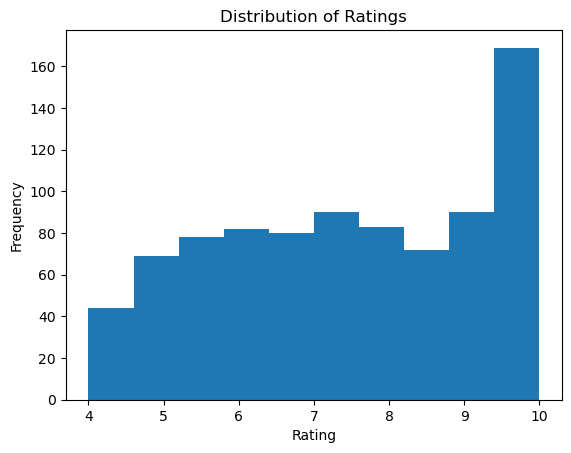

In [22]:
plt.hist(data['Rating'])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### so we can see here this is not normaly distributed then medium imputation 

In [23]:
data['Rating'].fillna(data['Rating'].median(),inplace=True)

In [24]:
data['Rating'].isnull().sum()

0

In [25]:
data['Total']*0.05

0      37.3450
1       4.5840
2      16.2155
3      32.0210
4      30.2085
        ...   
995     2.0175
996    68.1660
997     1.5920
998     3.2910
999    44.1700
Name: Total, Length: 1000, dtype: float64

In [26]:
data['Tax 5%'].fillna(data['Total']*0.05,inplace=True)

In [27]:
data['Tax 5%'].isnull().sum()

0

In [28]:
data['Customer type'] = data['Customer type'].fillna(data['Customer type'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Product line'] = data['Product line'].fillna(data['Product line'].mode()[0])
data['Payment'] = data['Payment'].fillna(data['Payment'].mode()[0])

In [29]:
missing_val_perc=data.isnull().sum()/len(data)*100
missing_val_perc.sort_values(ascending= False)

Branch                     0.0
City                       0.0
Longitude                  0.0
Rating                     0.0
gross income               0.0
gross margin percentage    0.0
cogs                       0.0
Payment                    0.0
Time                       0.0
Date                       0.0
Total                      0.0
Tax 5%                     0.0
Quantity                   0.0
Unit price                 0.0
Product line               0.0
Gender                     0.0
Customer type              0.0
Latitude                   0.0
dtype: float64

### now the data is clean as no null value is consist

In [30]:
### Feature extraction of datetime column 

data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Longitude                         float64
Latitude                          float64
dtype: object

In [31]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,A,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,2019-02-21,13:08,Ewallet,711.333333,4.761905,35.566667,9.100,96.1735,16.8409
1,C,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,2019-05-27,10:29,Cash,76.400000,4.761905,15.280000,10.000,96.0785,19.7633
2,A,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,2019-12-27,13:23,Credit card,324.310000,4.761905,0.000000,7.400,96.1735,16.8409
3,A,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,2019-11-15,20:33,Ewallet,465.760000,4.761905,174.660000,8.400,96.1735,16.8409
4,A,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,2019-03-31,10:37,Ewallet,604.170000,4.761905,0.000000,7.455,96.1735,16.8409


In [32]:
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Weekday'] = data['Date'].dt.day_name()

data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude,Day,Month,Weekday
0,A,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,2019-02-21,13:08,Ewallet,711.333333,4.761905,35.566667,9.100,96.1735,16.8409,21,2,Thursday
1,C,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,2019-05-27,10:29,Cash,76.400000,4.761905,15.280000,10.000,96.0785,19.7633,27,5,Monday
2,A,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,2019-12-27,13:23,Credit card,324.310000,4.761905,0.000000,7.400,96.1735,16.8409,27,12,Friday
3,A,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,2019-11-15,20:33,Ewallet,465.760000,4.761905,174.660000,8.400,96.1735,16.8409,15,11,Friday
4,A,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,2019-03-31,10:37,Ewallet,604.170000,4.761905,0.000000,7.455,96.1735,16.8409,31,3,Sunday


In [33]:
data['Time'][0].split(':')[1]

'08'

In [34]:
data['Hour'] = data['Time'].apply(lambda x:x.split(':')[0]).astype('int')
data['Minute'] = data['Time'].apply(lambda x:x.split(':')[1]).astype('int')

In [35]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude,Day,Month,Weekday,Hour,Minute
0,A,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,2019-02-21,13:08,Ewallet,711.333333,4.761905,35.566667,9.100,96.1735,16.8409,21,2,Thursday,13,8
1,C,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,2019-05-27,10:29,Cash,76.400000,4.761905,15.280000,10.000,96.0785,19.7633,27,5,Monday,10,29
2,A,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,2019-12-27,13:23,Credit card,324.310000,4.761905,0.000000,7.400,96.1735,16.8409,27,12,Friday,13,23
3,A,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,2019-11-15,20:33,Ewallet,465.760000,4.761905,174.660000,8.400,96.1735,16.8409,15,11,Friday,20,33
4,A,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,2019-03-31,10:37,Ewallet,604.170000,4.761905,0.000000,7.455,96.1735,16.8409,31,3,Sunday,10,37


# Outliers Code .. 

### Data Analysis 

### univariate 
### Bivariate
### multivariate

In [36]:
data.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating',
       'Longitude', 'Latitude', 'Day', 'Month', 'Weekday', 'Hour', 'Minute'],
      dtype='object')

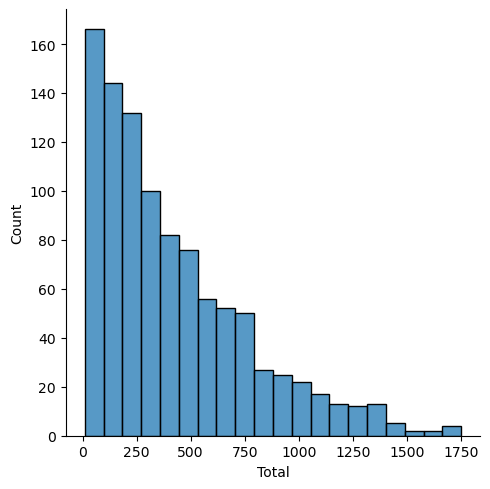

In [37]:
## Column - Total 

sns.displot(data = data, x = 'Total')

<Axes: xlabel='Total'>

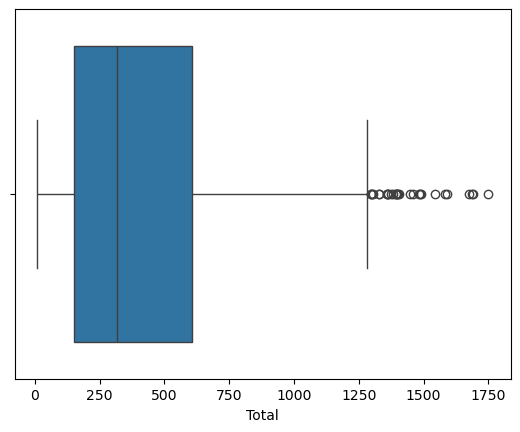

In [38]:
sns.boxplot(data = data, x = 'Total')

In [39]:
def univariate_analysis(col):
    fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20,12))
    axes[1].set_title('Histogram')
    sns.displot(data = data, x = col, ax = axes[1])
    
    axes[0].set_title('Boxplot')
    sns.boxplot(data = data, x = col, ax = axes[0])
    
    plt.tight_layout()

tight_layout() makes sure the titles and plots don’t overlap.

This creates a figure with 2 rows and 1 column of subplots (i.e., two plots stacked vertically).

figsize=(20, 12) makes the whole figure big and readable.

axes is a list of axes objects → axes[0] is the top plot, axes[1] is the bottom one.


ax=axes[0] tells it to draw on the first subplot (top).

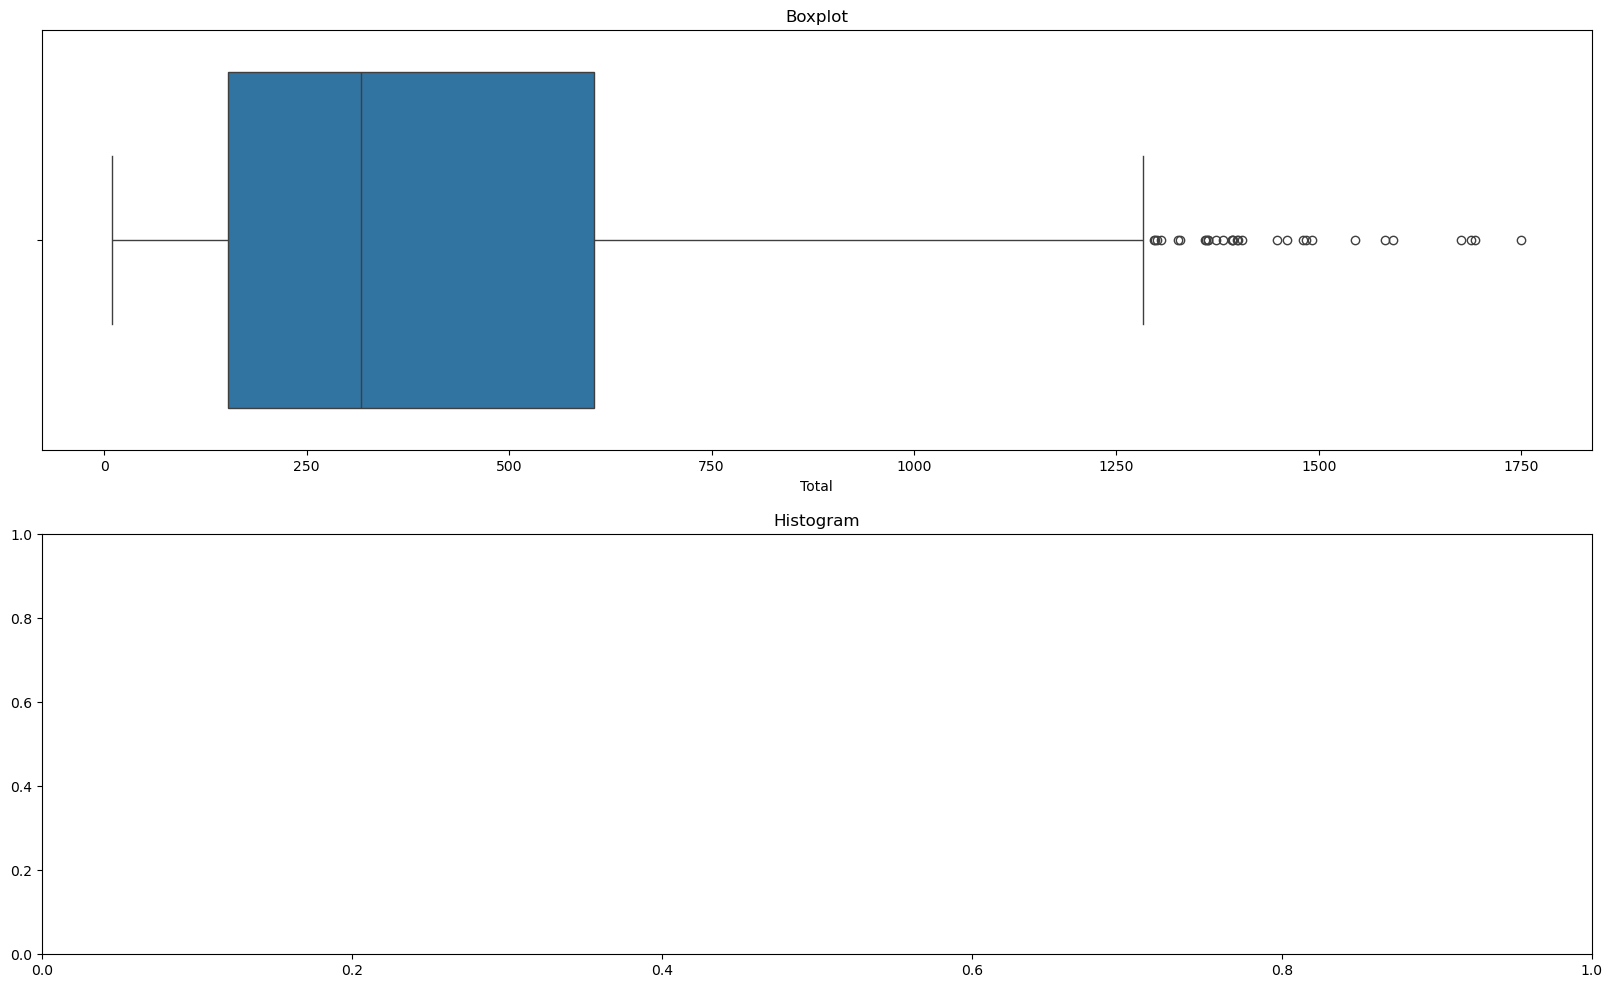

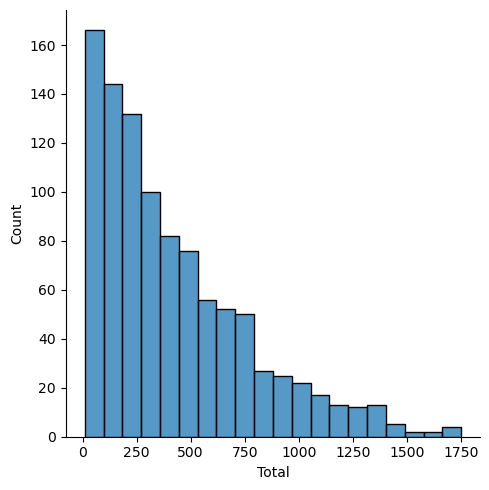

In [40]:
univariate_analysis('Total')

### categorical columns 

## gender 

<Axes: xlabel='Gender'>

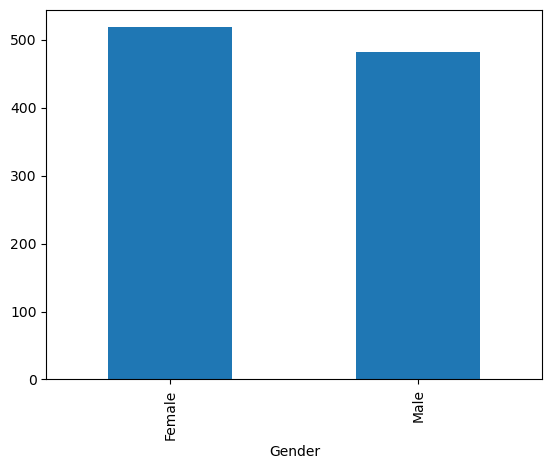

In [41]:
### categorical columns 

## gender 

data['Gender'].value_counts().plot.bar()

<Axes: xlabel='Gender', ylabel='count'>

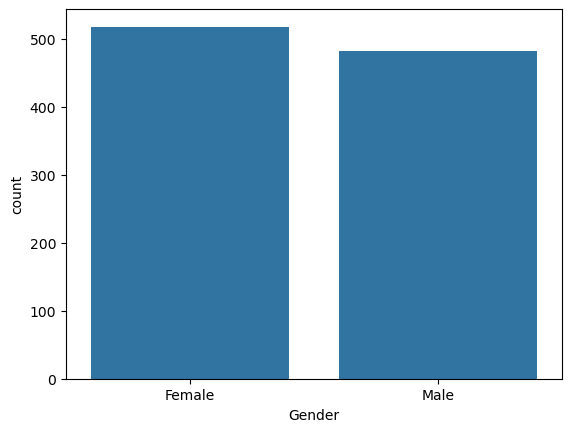

In [42]:
sns.countplot(data = data, x = 'Gender')

<Axes: xlabel='Customer type', ylabel='count'>

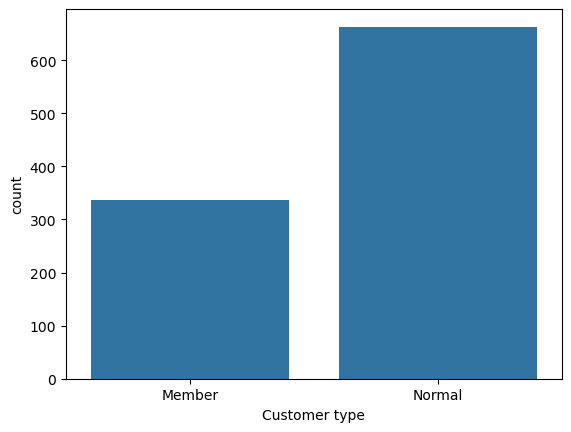

In [43]:
sns.countplot(data = data, x = 'Customer type')

## Bivariate Analysis

In [44]:
data.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating',
       'Longitude', 'Latitude', 'Day', 'Month', 'Weekday', 'Hour', 'Minute'],
      dtype='object')

In [45]:
data_2 = data[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income',
       'Rating','Day', 'Month', 'Hour','Minute']]

<Axes: >

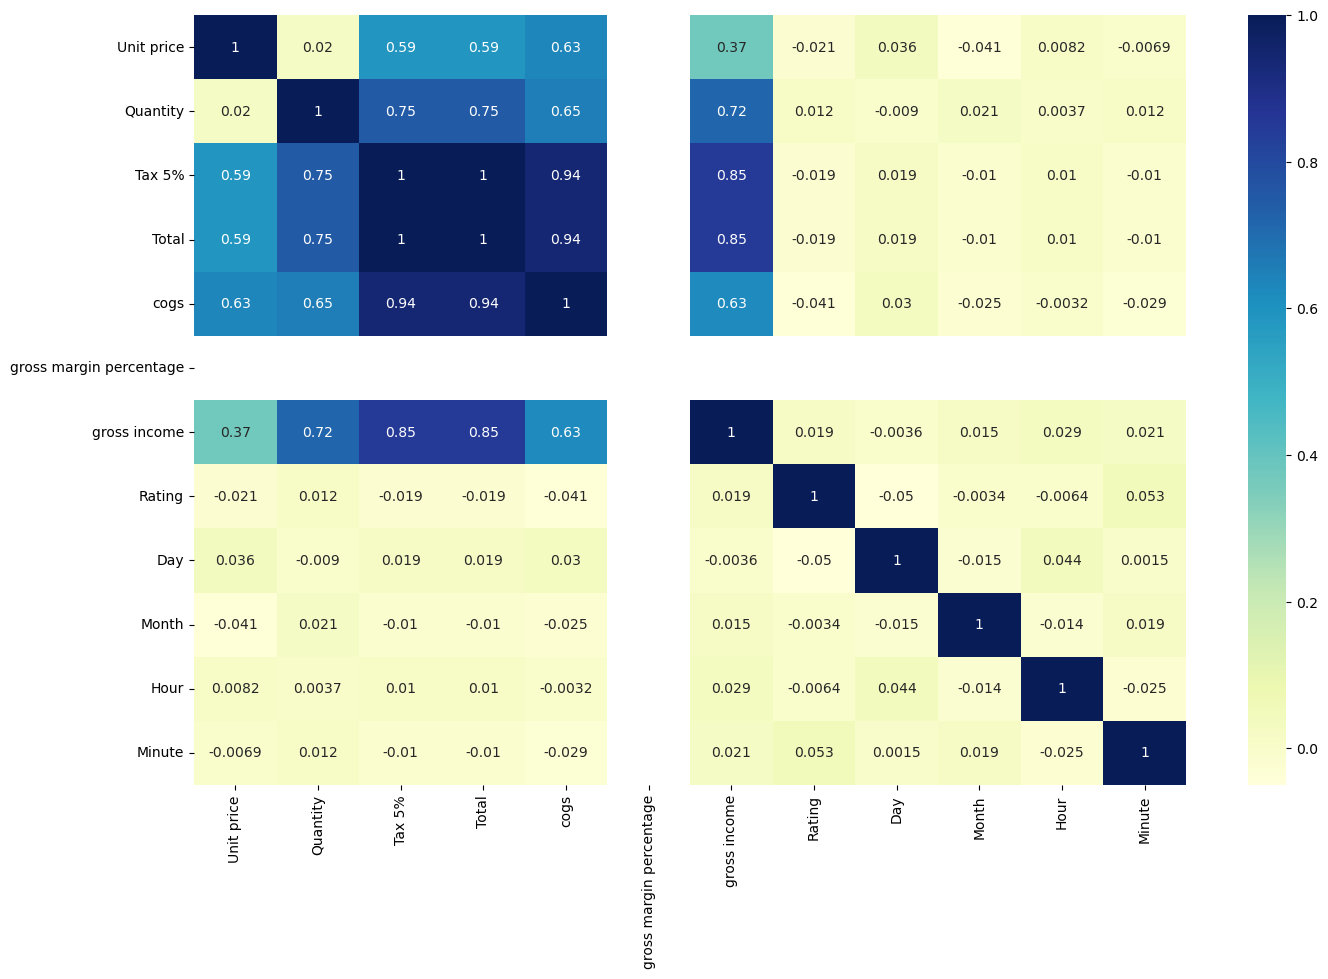

In [46]:
plt.figure(figsize = (16,10))
sns.heatmap(data_2.corr(), annot=True,cmap='YlGnBu')

In [47]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude,Day,Month,Weekday,Hour,Minute
0,A,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,2019-02-21,13:08,Ewallet,711.333333,4.761905,35.566667,9.100,96.1735,16.8409,21,2,Thursday,13,8
1,C,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,2019-05-27,10:29,Cash,76.400000,4.761905,15.280000,10.000,96.0785,19.7633,27,5,Monday,10,29
2,A,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,2019-12-27,13:23,Credit card,324.310000,4.761905,0.000000,7.400,96.1735,16.8409,27,12,Friday,13,23
3,A,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,2019-11-15,20:33,Ewallet,465.760000,4.761905,174.660000,8.400,96.1735,16.8409,15,11,Friday,20,33
4,A,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,2019-03-31,10:37,Ewallet,604.170000,4.761905,0.000000,7.455,96.1735,16.8409,31,3,Sunday,10,37


<Axes: xlabel='gross income', ylabel='Unit price'>

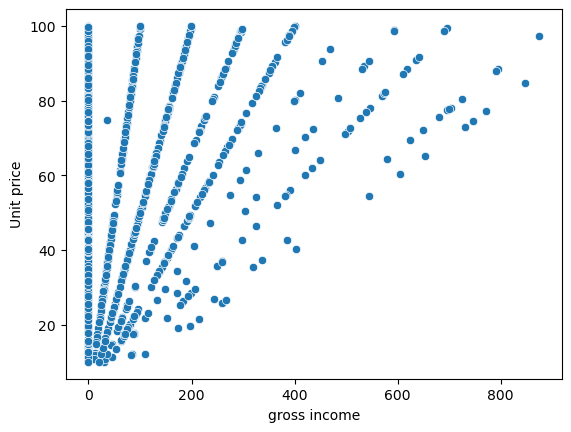

In [48]:
sns.scatterplot(data=data,x='gross income',y='Unit price')

In [49]:
data.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating',
       'Longitude', 'Latitude', 'Day', 'Month', 'Weekday', 'Hour', 'Minute'],
      dtype='object')

In [50]:
data[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income']].head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income
0,74.69,10,37.3450,746.90,711.333333,4.761905,35.566667
1,15.28,6,4.5840,91.68,76.400000,4.761905,15.280000
2,46.33,7,16.2155,324.31,324.310000,4.761905,0.000000
3,58.22,11,32.0210,640.42,465.760000,4.761905,174.660000
4,86.31,7,30.2085,604.17,604.170000,4.761905,0.000000


In [51]:
data[data['gross income'] < 1][['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income']]

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income
2,46.33,7,16.2155,324.31,324.31,4.761905,0.0
4,86.31,7,30.2085,604.17,604.17,4.761905,0.0
6,68.84,6,20.6520,413.04,413.04,4.761905,0.0
8,36.26,2,3.6260,72.52,72.52,4.761905,0.0
12,46.95,5,11.7375,234.75,234.75,4.761905,0.0
...,...,...,...,...,...,...,...
992,58.03,2,5.8030,116.06,116.06,4.761905,0.0
994,60.95,1,3.0475,60.95,60.95,4.761905,0.0
995,40.35,1,2.0175,40.35,40.35,4.761905,0.0
997,31.84,1,1.5920,31.84,31.84,4.761905,0.0


<Axes: xlabel='gross income', ylabel='Month'>

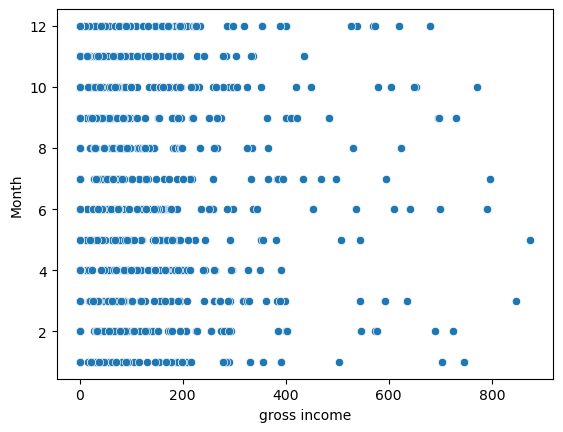

In [52]:
sns.scatterplot(data=data,x='gross income',y='Month')

In [53]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude,Day,Month,Weekday,Hour,Minute
0,A,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,2019-02-21,13:08,Ewallet,711.333333,4.761905,35.566667,9.100,96.1735,16.8409,21,2,Thursday,13,8
1,C,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,2019-05-27,10:29,Cash,76.400000,4.761905,15.280000,10.000,96.0785,19.7633,27,5,Monday,10,29
2,A,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,2019-12-27,13:23,Credit card,324.310000,4.761905,0.000000,7.400,96.1735,16.8409,27,12,Friday,13,23
3,A,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,2019-11-15,20:33,Ewallet,465.760000,4.761905,174.660000,8.400,96.1735,16.8409,15,11,Friday,20,33
4,A,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,2019-03-31,10:37,Ewallet,604.170000,4.761905,0.000000,7.455,96.1735,16.8409,31,3,Sunday,10,37


<Axes: xlabel='City', ylabel='gross income'>

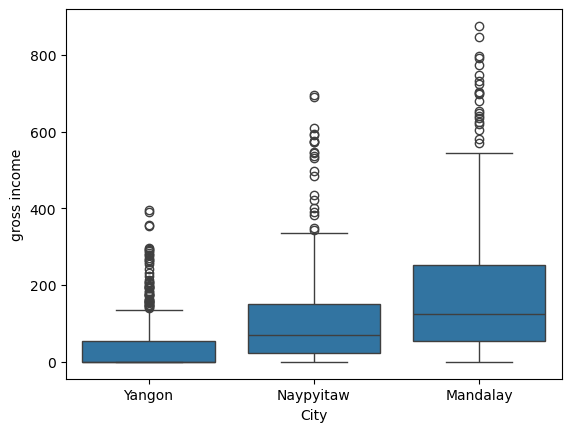

In [54]:
sns.boxplot(data = data, x= 'City', y='gross income')

<Axes: xlabel='Customer type', ylabel='gross income'>

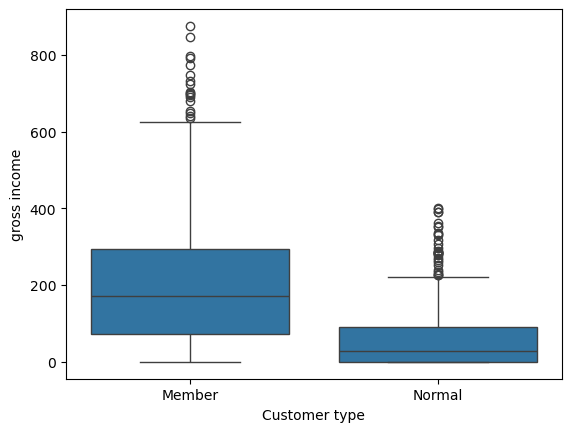

In [55]:
sns.boxplot(data = data, x= 'Customer type', y='gross income')

<Axes: xlabel='Month', ylabel='gross income'>

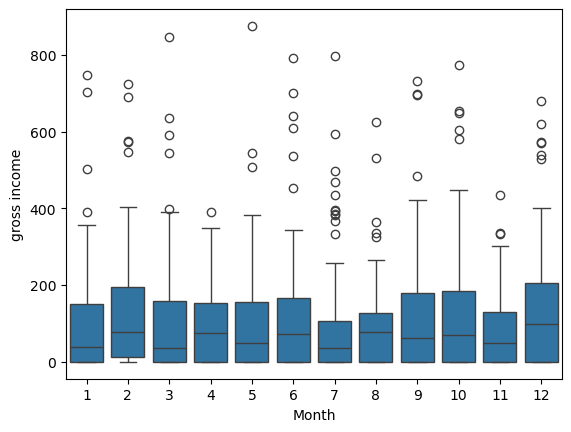

In [56]:
sns.boxplot(data = data, x= 'Month', y='gross income')